# notebook du nettoyage

Ce notebook est le fruit de notre travail sur le nettoyage du jeu de données 'OpenFoodFacts'

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies-et-préparation-de-l'environnement-du-travail" data-toc-modified-id="Import-des-librairies-et-préparation-de-l'environnement-du-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies et préparation de l'environnement du travail</a></span></li><li><span><a href="#Traitement-et-préparation-du--le-jeu-de-données" data-toc-modified-id="Traitement-et-préparation-du--le-jeu-de-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Traitement et préparation du  le jeu de données</a></span><ul class="toc-item"><li><span><a href="#Import-du-jeu-de-données" data-toc-modified-id="Import-du-jeu-de-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import du jeu de données</a></span></li><li><span><a href="#Découverte-du-dataset" data-toc-modified-id="Découverte-du-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Découverte du dataset</a></span></li><li><span><a href="#Réduction-de--la-taille-du-dataset" data-toc-modified-id="Réduction-de--la-taille-du-dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Réduction de  la taille du dataset</a></span></li><li><span><a href="#Filtrage-du-dataset" data-toc-modified-id="Filtrage-du-dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Filtrage du dataset</a></span></li></ul></li><li><span><a href="#Imputation-des-données-manquantes" data-toc-modified-id="Imputation-des-données-manquantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imputation des données manquantes</a></span></li><li><span><a href="#Enregistrement-du-Nouveau-jeu-de-données-dans-un-fichier-csv" data-toc-modified-id="Enregistrement-du-Nouveau-jeu-de-données-dans-un-fichier-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Enregistrement du Nouveau jeu de données dans un fichier csv</a></span></li></ul></div>

## Import des librairies et préparation de l'environnement du travail

In [5]:
#Importing librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from urllib import request
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
import os
import zipfile
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("La version utilisée de la laibririe:  {}=={}".format(*r))


La version utilisée de la laibririe:  seaborn==0.11.1
La version utilisée de la laibririe:  scikit-learn==0.24.2
La version utilisée de la laibririe:  pandas==1.2.4
La version utilisée de la laibririe:  numpy==1.18.5
La version utilisée de la laibririe:  matplotlib==3.3.3


## Traitement et préparation du  le jeu de données  

### Import du jeu de données

In [7]:
%%time
#Importing files from a zip repository and 

path=r"\Users\Utilisateur\Downloads\en.openfoodfacts.org.products.csv"#### le chemin vers le répertoire des données
df =  pd.read_csv(path,sep='\t',low_memory=False)


Wall time: 4min 33s


### Découverte du dataset

In [8]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818322 entries, 0 to 1818321
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 9.5 GB


In [10]:
#This function will print the details of our dataset
def description(data):
    print('Le dataset est de taille:{}'.format( data.shape))
    print('Le dataset comporte {} lignes et {} colonnes'.format( data.shape[0], data.shape[1]))
    print('Le dataset contient {} colonnes de type object'.format( sum(data.dtypes==object)))
    print('Le dataset contient {} colonnes numérique'.format( sum(data.dtypes=='int64' )+sum( data.dtypes=='float64')))
    print('Le dataset contient {} colonnes de type booléans'.format( sum(data.dtypes==bool)))
    print('Le dataset contient {} colonnes de type date'.format( sum(data.dtypes=='datetime64')))
    print('Le dataset contient {} colonnes de type timedelta'.format( sum(data.dtypes=='timedelta[ns]')))
    print('Le dataset contient {} colonnes de type catégorie'.format( sum(data.dtypes=='category')))

description(df)

Le dataset est de taille:(1818322, 186)
Le dataset comporte 1818322 lignes et 186 colonnes
Le dataset contient 61 colonnes de type object
Le dataset contient 125 colonnes numérique
Le dataset contient 0 colonnes de type booléans
Le dataset contient 0 colonnes de type date
Le dataset contient 0 colonnes de type timedelta
Le dataset contient 0 colonnes de type catégorie


In [11]:
def Check_duplicate(data):
    if data.duplicated().any():
        return "Le dataset contient des données dupliquées"
    return "Le dataset ne contient pas des données dupliquées"
Check_duplicate(df)

'Le dataset contient des données dupliquées'

On va faire un autre test pour vérifier les données dupliquées, en utilisant le code bar du produit et l'url ,et dans ce cas le résultat est différent 

In [12]:
df=df.drop_duplicates(subset=['code','url'], keep='first', ignore_index=True)
df.shape

(1818317, 186)

On va analyser le nombre des données manquantes sur chaque variable.

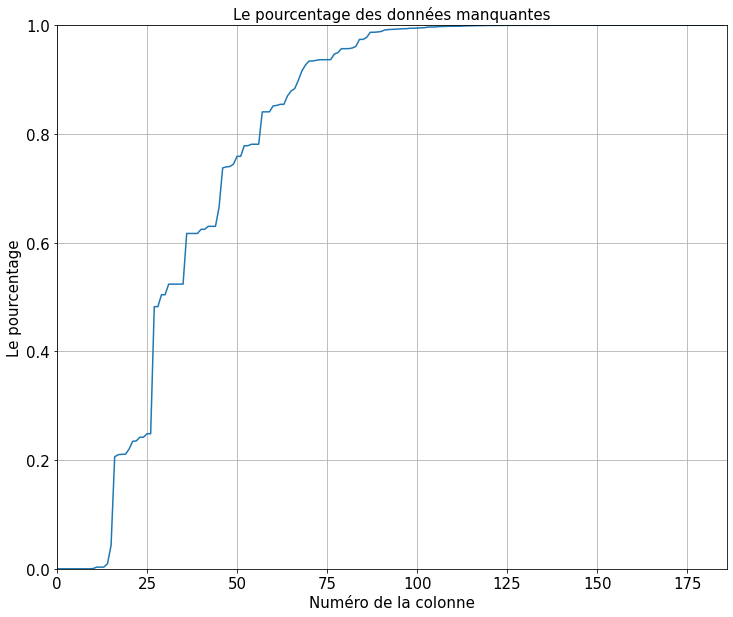

In [13]:
def plotting(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    #plt.subplot(2,3,i)
    plt.figure(figsize=(12,10))
    plt.plot(data.isnull().mean().sort_values().values)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim([0,data.shape[1]])
    plt.ylim([0,1])
    plt.xlabel("Numéro de la colonne")
    plt.ylabel("Le pourcentage")
    plt.grid()
    
    plt.title("Le pourcentage des données manquantes")
plotting(df,'data') 

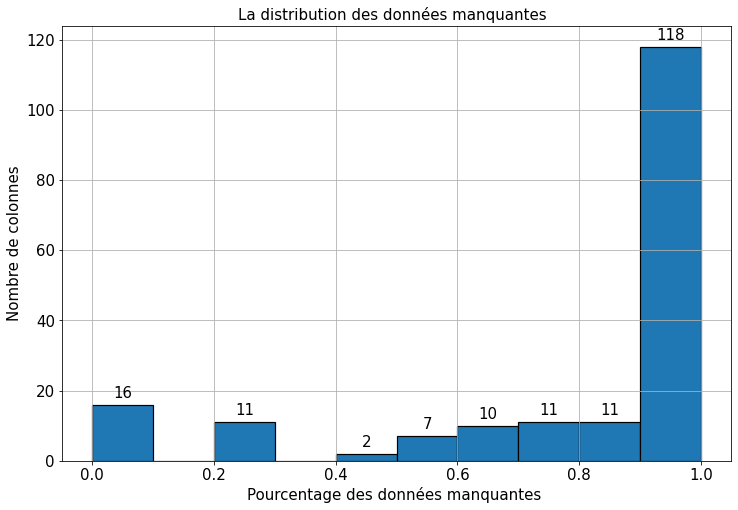

In [14]:
def histogram(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    #plt.subplot(2,3,i)
    fig, ax = plt.subplots(1, figsize=(12,8))
    #plt.figure(figsize=(12,10))
    n, bins, patches= plt.hist(data.isnull().mean().sort_values().values,edgecolor='black', linewidth=1.2)
    #xint = []
    #locs, labels = plt.xticks()
   # for each in locs:B
        #xint.append(int(each))
    #plt.xticks(xint)
    #plt.xlim([0,data.shape[1]])
    #plt.yticks([0,20,40,60,80,100,120,125])
    # plot values on top of bars
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value+2, int(value), ha='center')

    plt.ylabel("Nombre de colonnes")
    plt.xlabel("Pourcentage des données manquantes ")
    plt.grid()
    
    plt.title("La distribution des données manquantes  ")
    plt.show()
   

histogram(df,'data') 

On remarque que notre dataset contient 118 colonnes avec plus de 90% de données manquantes

### Réduction de  la taille du dataset 

In [15]:
#On regarde l'usage en mémoire
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818317 entries, 0 to 1818316
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 9.5 GB


L'usage de mémoire étant énorme, on va tacher à faire des optimisations en réduisant le nombre de lignes( suppression des NA, filtrage,...), réduction du nombre de colonnes( choix des variables pertinentes, élimination des variables non remplies), et en optimisant les types des variables

In [16]:
# On va récupérer le liste des colonnes où, on n'a aucune donnée saisie pour tout le dataset afin de  les retirer de notre dataset dès l'import.
df_NA=pd.DataFrame(df.isnull().mean().sort_values(ascending=False),columns=['Moy']).reset_index()
df_NA['Moy'].value_counts()
colonnes_NA=list(df_NA[df_NA['Moy']==1]['index'])
colonnes_NA#### les variables sans données renseignées

0.000000    9
1.000000    5
0.523673    4
0.999995    3
0.999997    3
           ..
0.999711    1
0.999999    1
0.994363    1
0.209979    1
0.665245    1
Name: Moy, Length: 146, dtype: int64

['no_nutriments',
 'allergens_en',
 'cities',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil']

On inspecte les colonnes afin d'avoir une idée sur les colonnes qui pourraient etre sans utilité pour notre application

In [17]:
df['categories'].describe()
df['categories'].unique()
df['categories'].isnull().sum()
df['categories'].isnull().mean()

count     866116
unique     98244
top       Snacks
freq       32697
Name: categories, dtype: object

array([nan, 'Epicerie, Condiments, Sauces, Moutardes', 'Xsf', ...,
       'Extrudált Kukorica', 'Vinaigres, Sèves de bouleau',
       'Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen'], dtype=object)

952201

0.5236716150154236

Il y  a des variables qui contiennent plus ou moins la meme information, dans ce cas, on prend le taux de remplissage et les données représentées comme facteur afin de décider laquelle on doit garder comme dns le cs de:
'additives','additives_en','additives_n' où on a gardé seulement 'additives_n' qui représente le nombre de'additifs présent dans chaque produit

In [18]:
df['additives'].unique()
df['additives_en'].unique()
df['additives_n'].unique()
df['additives'].isnull().sum()
df['additives_n'].isnull().sum()
df['additives_en'].isnull().sum()


array([nan,
       ' [ 59-garniture -> fr:59-garniture  ]  [ 59 -> fr:59  ]  [ 22 -> fr:22  ]  [ 3-sauce-tomate-cuisinee -> fr:3-sauce-tomate-cuisinee  ]  [ 3-sauce-tomate -> fr:3-sauce-tomate  ]  [ 3-sauce -> fr:3-sauce  ]  [ 3 -> en:fd-c  ]  [ eau -> fr:eau  ]  [ puree-de-tomates-double-concentree -> fr:puree-de-tomates-double-concentree  ]  [ puree-de-tomates-double -> fr:puree-de-tomates-double  ]  [ puree-de-tomates -> fr:puree-de-tomates  ]  [ puree-de -> fr:puree-de  ]  [ puree -> fr:puree  ]  [ farine-de-ble -> fr:farine-de-ble  ]  [ farine-de -> fr:farine-de  ]  [ farine -> fr:farine  ]  [ huile-d-olive-vierge-extra -> fr:huile-d-olive-vierge-extra  ]  [ huile-d-olive-vierge -> fr:huile-d-olive-vierge  ]  [ huile-d-olive -> fr:huile-d-olive  ]  [ huile-d -> fr:huile-d  ]  [ huile -> fr:huile  ]  [ oignons-deshydrates -> fr:oignons-deshydrates  ]  [ oignons -> fr:oignons  ]  [ sucre -> fr:sucre  ]  [ arome -> fr:arome  ]  [ ail-deshydrate -> fr:ail-deshydrate  ]  [ ail -> fr:ai

array([nan,
       'E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose',
       'E406 - Agar', ...,
       'E160a - Carotene,E330 - Citric acid,E414 - Acacia gum,E473 - Sucrose esters of fatty acids',
       'E150c - Ammonia caramel,E319 - Tertiary-butylhydroquinone (tbhq),E339 - Sodium phosphates,E339i - Monosodium phosphate,E452 - Polyphosphates,E452i - Sodium polyphosphate,E452vi - Sodium tripolyphosphate,E621 - Monosodium glutamate,E627 - Disodium guanylate,E631 - Disodium inosinate',
       'E1520 - Propylene Glycol,E211 - Sodium benzoate,E330 - Citric acid,E415 - Xanthan gum,E460 - Cellulose,E460i - Microcrystalline cellulose,E955 - Sucralose'],
      dtype=object)

array([nan,  0.,  5.,  1.,  2.,  3.,  7.,  6.,  4.,  8., 10., 11.,  9.,
       13., 12., 17., 33., 14., 16., 15., 20., 18., 21., 23., 25., 24.,
       26., 19., 28., 22., 27., 29., 30., 32., 31., 39., 41., 37., 49.,
       36., 38.])

1818313

1121686

1415246

Optimiser les colonnes de type de données 'object' aboutira à un gain de ressource mémoire. La méthode consiste à affecter un index à chaque objet fortement redondant. Elle n’est viable que si le nombre d’objets uniques représente plus de 50% du nombre total d’objets.

In [19]:
%%time
df_obj = df.select_dtypes(include=['object']).copy()
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    if len(df_obj[col].unique()) / len(df_obj[col]) < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)    
    usage_mb = usage_b / 1024 ** 2 # convertir les bytes en megabytes
    return "{:03.2f} MB".format(usage_mb) # afficher sous format nombre (min 3 chiffres) et une précision de deux décimales
a=mem_usage(df_obj)
b=mem_usage(converted_obj)
c=100*float(b.replace('MB',''))/float(a.replace('MB',''))
print("L'utilisation de la mémoire avant traitement:{}".format(a))
print("L'utilisation de la mémoire après traitement:{}".format(b))
print( "le gain en mémoire est de:{:.2f}%".format(c))


L'utilisation de la mémoire avant traitement:7997.40 MB
L'utilisation de la mémoire après traitement:2407.18 MB
le gain en mémoire est de:30.10%
Wall time: 1min 3s


Par défaut Pandas encode les nombres en 64 bits. Dans la majorité des cas, la plage d’encodage est surdimensionnée.Pour y remédier, la librairie propose une fonction pd.to_numeric() pour optimiser l’encodage des valeurs numériques. Celle-ci parcourt le DataFrame, colonne par colonne et sélectionne la plage d’encodage (8, 16, 32, ou 64 bits) la plus efficiente pour chacune d’elle.Le paramètre downcast=’unsigned’ permet de définir un encodage exclusif des entiers positifs. La fonction apply() sert quant à elle à itérer le traitement sur toutes les colonnes.La même opération peut être réalisée sur les colonnes de float

In [20]:
%%time
df_float = df.select_dtypes(include=['float']).copy()
#df_float.info(memory_usage='deep')
converted_float = df_float.apply(pd.to_numeric, downcast='float')
#converted_float.info(memory_usage='deep')
a=mem_usage(df_float)
b=mem_usage(converted_float)
c=100*float(b.replace('MB',''))/float(a.replace('MB',''))
print("L'utilisation de la mémoire avant traitement:{}".format(a))
print("L'utilisation de la mémoire après traitement:{}".format(b))
print( "le gain en mémoire est de:{:.2f}%".format(c))


L'utilisation de la mémoire avant traitement:1706.34 MB
L'utilisation de la mémoire après traitement:853.17 MB
le gain en mémoire est de:50.00%
Wall time: 9.22 s


In [21]:
%%time
####### mask over >0 
df_int = df.select_dtypes(include=['int64']).copy()
(df_int>0).all()### checking that all entries are above 
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
#converted_float.info(memory_usage='deep')
a=mem_usage(df_int)
b=mem_usage(converted_int)
c=100*float(b.replace('MB',''))/+float(a.replace('MB',''))
print("L'utilisation de la mémoire avant traitement:{}".format(a))
print("L'utilisation de la mémoire après traitement:{}".format(b))
print( "le gain en mémoire est de:{:.2f}%".format(c))


L'utilisation de la mémoire avant traitement:27.75 MB
L'utilisation de la mémoire après traitement:13.87 MB
le gain en mémoire est de:49.98%
Wall time: 783 ms


In [22]:
%%time
optimized_df=df.copy()
optimized_df[converted_obj.columns] = converted_obj
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
#print(mem_usage(df))
#print(mem_usage(optimized_df))
a=mem_usage(df)
b=mem_usage(optimized_df)
c=100*float(b.replace('MB',''))/float(a.replace('MB',''))
print("L'utilisation de la mémoire avant traitement:{}".format(a))
print("L'utilisation de la mémoire après traitement:{}".format(b))
print( "le gain en mémoire est de:{:.2f}%".format(c))


L'utilisation de la mémoire avant traitement:9731.48 MB
L'utilisation de la mémoire après traitement:3274.22 MB
le gain en mémoire est de:33.65%
Wall time: 4min 57s


In [23]:
#On s'assure qu'on le meme shape
optimized_df.shape
df.shape

(1818317, 186)

(1818317, 186)

In [24]:

del_col=colonnes_NA+list(set(['fruits-vegetables-nuts_100g','allergens','nutrition-score-fr_100g','glycemic-index_100g','serving_size','nutrition-score-uk_100g', 'water-hardness_100g','additives','additives_en','ingredients_text','casein_100g','serum-proteins_100g','collagen-meat-protein-ratio_100g','folates_100g','beta-carotene_100g','cholesterol_100g','energy-from-fat_100g','alcohol_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g','vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','vitamin-b6_100g','vitamin-b9_100g','vitamin-b12_100g','biotin_100g','pantothenic-acid_100g','silica_100g','bicarbonate_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','copper_100g','manganese_100g','fluoride_100g','selenium_100g','chromium_100g','molybdenum_100g','iodine_100g','caffeine_100g','taurine_100g','ph_100g','omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g','cocoa_100g','chlorophyl_100g','carbon-footprint_100g','carbon-footprint-from-meat-or-fish_100g','choline_100g','phylloquinone_100g','beta-glucan_100g','inositol_100g','carnitine_100g','fruits-vegetables-nuts-estimate_100g','fruits-vegetables-nuts-dried_100g','-soluble-fiber_100g','-insoluble-fiber_100g','nucleotides_100g','-sucrose_100g','-glucose_100g','-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g','starch_100g','polyols_100g','-oleic-acid_100g','-elaidic-acid_100g','-gondoic-acid_100g','-mead-acid_100g','-erucic-acid_100g','-nervonic-acid_100g','trans-fat_100g','-butyric-acid_100g', '-caproic-acid_100g','-caprylic-acid_100g','-capric-acid_100g','-lauric-acid_100g','-myristic-acid_100g','-palmitic-acid_100g','-stearic-acid_100g','-arachidic-acid_100g','-behenic-acid_100g','-lignoceric-acid_100g','-cerotic-acid_100g','-montanic-acid_100g','-melissic-acid_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','-alpha-linolenic-acid_100g','-eicosapentaenoic-acid_100g','-docosahexaenoic-acid_100g','-linoleic-acid_100g','-arachidonic-acid_100g','-gamma-linolenic-acid_100g','-dihomo-gamma-linolenic-acid_100g','ecoscore_score_fr','ecoscore_grade_fr','states','states_tags','states_en','traces','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags','traces_tags','traces_en','emb_codes','labels','image_url','image_small_url','image_ingredients_url','image_ingredients_small_url','image_nutrition_url','categories_tags','categories_en','origins','image_nutrition_small_url','manufacturing_places','manufacturing_places_tags','brands_tags','origins_en','origins_tags','url','creator','created_t','last_modified_t','last_modified_datetime','abbreviated_product_name','generic_name','quantity','packaging','packaging_tags','packaging_text','brand_owner','labels_tags','labels_en','emb_codes_tags','first_packaging_code_geo','cities_tags','purchase_places','stores','countries_en','countries_tags','traces','traces_tags','serving_quantity','additives_tags','ingredients_from_palm_oil_n','ingredients_from_palm_oil','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','image_url','image_small_url','main_category_en','main_category']))
len(del_col)
#'manufacturing_places_tags'
#,'brands_tags','origins_en','origins_tags','url','creator','created_t','created_datetime' ,'last_modified_t' ,'last_modified_datetime','abbreviated_product_name','generic_name','quantity','packaging','packaging_tags','packaging_text']
dtypes = optimized_df.drop(del_col,axis=1).dtypes
column_types = dict(zip(dtypes.index, [i.name for i in dtypes.values]))
print(len(column_types))


165

23


la variable 'column_types' peut maintenant être réinjecté à l’ouverture du csv comme argument de la fonction read_csv() afin d'indiquer le type etle nom des colonnes.

### Filtrage du dataset

On va filtrer notre dataset sur les deux dimensions:
- Colonnes: Choix des variables pertinentes pour notre application
- Lignes : Choix des valeurs de variables qui nous intérèssent pour l'idée de l'application 

In [25]:
%%time
path=r"\Users\Utilisateur\Downloads\en.openfoodfacts.org.products.csv"

read_and_optimized = pd.read_csv(path,sep='\t',dtype=column_types,usecols=list(column_types.keys()))
read_and_optimized.info(memory_usage='deep')
read_and_optimized.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818322 entries, 0 to 1818321
Data columns (total 23 columns):
 #   Column              Dtype   
---  ------              -----   
 0   code                object  
 1   created_datetime    object  
 2   product_name        object  
 3   brands              category
 4   categories          category
 5   countries           category
 6   additives_n         float32 
 7   nutriscore_score    float32 
 8   nutriscore_grade    category
 9   nova_group          float32 
 10  pnns_groups_1       category
 11  pnns_groups_2       category
 12  energy-kj_100g      float32 
 13  energy-kcal_100g    float32 
 14  energy_100g         float32 
 15  fat_100g            float32 
 16  saturated-fat_100g  float32 
 17  carbohydrates_100g  float32 
 18  sugars_100g         float32 
 19  fiber_100g          float32 
 20  proteins_100g       float32 
 21  salt_100g           float32 
 22  sodium_100g         float32 
dtypes: category(6), float32(14), obj

(1818322, 23)

On va nous contenter des produits qui se vendent sur le territoire français ce qui va réduire la taille du dataset

In [26]:
#mylist = list(dict.fromkeys(list(read_and_optimized['countries'].str.lower().values)))
#a = [x for x in mylist  if 'fr' in str(x)]
#len(['fr' in str(x) for x in df['countries'].str.lower().values])
read_and_optimized=read_and_optimized[read_and_optimized['countries'].str.contains('fr',case=False, na=False)]
read_and_optimized['countries'].unique()[:30]
read_and_optimized.info(memory_usage='deep')

['France', 'en:France', 'en:france', 'en:fr', 'en:FR', ..., 'France,France', 'en:fr, United States', 'France, en:india', 'France, UK', 'Frankreich, Spanien, en:at']
Length: 30
Categories (5392, object): ['France', 'en:France', 'en:france', 'en:fr', ..., 'Australia,Belgium,France,Japan,New Zealand,Un..., 'Belgium, en:australia, en:france', 'Frankreich,Französisch-Polynesien', 'Spain,Argentina - Español,Armenia - Pyсский,A...]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810781 entries, 0 to 1818321
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   code                810781 non-null  object  
 1   created_datetime    810781 non-null  object  
 2   product_name        787721 non-null  object  
 3   brands              429221 non-null  category
 4   categories          371830 non-null  category
 5   countries           810781 non-null  category
 6   additives_n         246792 non-null  float32 
 7   nutriscore_score    287756 non-null  float32 
 8   nutriscore_grade    287756 non-null  category
 9   nova_group          207342 non-null  float32 
 10  pnns_groups_1       799286 non-null  category
 11  pnns_groups_2       810633 non-null  category
 12  energy-kj_100g      75400 non-null   float32 
 13  energy-kcal_100g    605350 non-null  float32 
 14  energy_100g         632488 non-null  float32 
 15  fat_100g        

In [27]:
read_and_optimized.describe()
#read_and_optimized['water-hardness_100g'].isnull().mean() le taux est égal à 1, donc pas de données remplies , ce qui nous a poussé à exclure cette variable 

,additives_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,246792.000000,287756.000000,207342.000000,7.540000e+04,6.053500e+05,6.324880e+05,626529.000000,629724.000000,626462.000000,629049.000000,141083.000000,628396.000000,611945.000000,611944.000000
mean,1.616025,9.506005,3.408417,1.099710e+03,2.829226e+02,1.177144e+03,14.303976,5.439365,27.334127,13.725818,3.021620,9.132618,1.324066,0.529727
std,2.376343,8.764885,0.970888,4.055721e+03,3.754707e+03,1.542274e+04,116.563202,28.858746,150.383682,21.874277,5.729105,218.455795,33.499931,13.400031
min,0.000000,-15.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,4.250000e+02,1.110000e+02,4.640000e+02,1.000000,0.200000,2.600000,0.600000,0.100000,1.500000,0.060000,0.024000
50%,1.000000,10.000000,4.000000,9.770000e+02,2.650000e+02,1.096000e+03,8.000000,2.000000,14.000000,3.500000,1.700000,6.200000,0.510000,0.204000
75%,2.000000,16.000000,4.000000,1.617000e+03,4.010000e+02,1.674000e+03,22.000000,8.000000,52.000000,19.799999,3.700000,12.900000,1.300000,0.520000
max,30.000000,40.000000,4.000000,1.094259e+06,2.910000e+06,1.220000e+07,91200.000000,21900.000000,117000.000000,6880.000000,1010.000000,173000.000000,25000.000000,10000.000000


On remarque que notre dataset comporte beaucoup de valeurs aberrantes:   
le maximum est supérieur à 100 sur les colonnes suivantes:   
- fat_100g  , saturated-fat_100g, sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g 

Donc on doit filtrer les valeurs supérieurs à 100.   
On remarque aussi que sur la colonne 'sugars_100g',le minimum est égal à -1, donc on doit filtrer et garder que les valeurs positives

In [28]:
read_and_optimized=read_and_optimized[(read_and_optimized['sugars_100g']>=0)&
                                      (read_and_optimized['carbohydrates_100g']>=0)&
                                      (read_and_optimized['carbohydrates_100g']<=100)&
                                      (read_and_optimized['sugars_100g']<=100)&
                                      (read_and_optimized['fat_100g']<=100)&
                                      (read_and_optimized['saturated-fat_100g']<=100)&
                                      (read_and_optimized['sugars_100g']<=100)&
                                      (read_and_optimized['fiber_100g']<=100)&
                                      (read_and_optimized['proteins_100g']<=100)&
                                      (read_and_optimized['salt_100g']<=100)&
                                      (read_and_optimized['sodium_100g']<=100)]

In [29]:
read_and_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137246 entries, 4 to 1818262
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   code                137246 non-null  object  
 1   created_datetime    137246 non-null  object  
 2   product_name        136379 non-null  object  
 3   brands              134802 non-null  category
 4   categories          109233 non-null  category
 5   countries           137246 non-null  category
 6   additives_n         119293 non-null  float32 
 7   nutriscore_score    103445 non-null  float32 
 8   nutriscore_grade    103445 non-null  category
 9   nova_group          100887 non-null  float32 
 10  pnns_groups_1       136831 non-null  category
 11  pnns_groups_2       137246 non-null  category
 12  energy-kj_100g      46705 non-null   float32 
 13  energy-kcal_100g    120681 non-null  float32 
 14  energy_100g         137184 non-null  float32 
 15  fat_100g        

In [30]:
read_and_optimized['nova_group'].describe()
read_and_optimized['nova_group'].unique()
read_and_optimized['nova_group'].isnull().sum()
read_and_optimized['nova_group'].isnull().mean()

count    100887.000000
mean          3.421481
std           0.982358
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: nova_group, dtype: float64

array([nan,  4.,  3.,  1.,  2.], dtype=float32)

36359

0.26491846756918236

In [31]:
read_and_optimized[read_and_optimized['pnns_groups_1']!='unknown']['pnns_groups_1']

4                 Fat and sauces
24                 Sugary snacks
34         Fruits and vegetables
69          Cereals and potatoes
330              Composite foods
                   ...          
1817849            Sugary snacks
1817894            Sugary snacks
1817910          Composite foods
1818100    Fruits and vegetables
1818243     Cereals and potatoes
Name: pnns_groups_1, Length: 97550, dtype: category
Categories (14, object): ['Beverages', 'Cereals and potatoes', 'Composite foods', 'Fat and sauces', ..., 'sugary-snacks', 'unknown', 'cereals-and-potatoes', 'salty-snacks']

In [32]:
read_and_optimized['pnns_groups_1'].describe()

count      136831
unique         14
top       unknown
freq        39696
Name: pnns_groups_1, dtype: object

On va supprimer les valeurs manquantes sur 'nova_group'et 'nutriscore_score' car ils sont des variables indispensables pour notre application

In [33]:
data=read_and_optimized.dropna(subset=['nova_group','nutriscore_score']) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84140 entries, 69 to 1817607
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   code                84140 non-null  object  
 1   created_datetime    84140 non-null  object  
 2   product_name        83913 non-null  object  
 3   brands              82819 non-null  category
 4   categories          84140 non-null  category
 5   countries           84140 non-null  category
 6   additives_n         84096 non-null  float32 
 7   nutriscore_score    84140 non-null  float32 
 8   nutriscore_grade    84140 non-null  category
 9   nova_group          84140 non-null  float32 
 10  pnns_groups_1       83928 non-null  category
 11  pnns_groups_2       84140 non-null  category
 12  energy-kj_100g      36769 non-null  float32 
 13  energy-kcal_100g    71162 non-null  float32 
 14  energy_100g         84138 non-null  float32 
 15  fat_100g            84140 non-nul

In [34]:
data.describe()
data.reset_index()

,additives_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,84096.000000,84140.000000,84140.000000,36769.000000,71162.000000,84138.000000,84140.000000,84140.000000,84140.000000,84140.000000,84140.000000,84140.000000,84140.000000,84140.000000
mean,1.813951,7.260613,3.351593,1080.617798,280.223755,1135.378784,12.806030,4.689716,30.175570,13.100036,2.807539,7.625741,0.880978,0.353020
std,2.368143,8.909484,1.014073,757.445862,802.527466,782.679749,15.888732,7.382478,26.843061,17.637934,4.101678,7.746487,2.251762,0.916862
min,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,426.000000,110.000000,448.000000,1.300000,0.300000,6.000000,1.300000,0.500000,2.000000,0.076200,0.030480
50%,1.000000,6.000000,4.000000,963.000000,261.000000,1047.000000,6.900000,1.700000,19.454377,4.300000,1.700000,6.000000,0.540000,0.216000
75%,3.000000,14.000000,4.000000,1631.000000,413.000000,1699.000000,19.900000,6.000000,55.000000,19.200001,3.600000,10.000000,1.100000,0.440000
max,24.000000,36.000000,4.000000,12600.000000,208279.000000,19305.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,100.000000,49.987202


,index,code,created_datetime,product_name,brands,categories,countries,additives_n,nutriscore_score,nutriscore_grade,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,69,0000000005470,2017-11-27T10:34:20Z,BAguette bressan,Crousresto',"Aliments et boissons à base de végétaux, Alime...",France,3.0,-4.0,a,...,160.0,669.000000,2.200000,0.50,25.200001,0.600000,1.60,9.500,0.358,0.1432
1,330,0000000274722,2017-12-30T18:41:49Z,Blanquette de Volaille et son Riz,Comme J’aime,"Plats préparés, Produits à la viande, Plats pr...",France,2.0,0.0,b,...,NaN,450.000000,2.200000,0.90,15.300000,0.500000,0.50,6.800,0.700,0.2800
2,353,0000000491228,2018-12-01T19:02:44Z,Entremets Crème Brulée,Comme j'aime,"Produits laitiers, Desserts, Produits déshydra...",France,4.0,2.0,b,...,NaN,1952.400024,15.300000,11.20,75.500000,69.800003,0.10,6.800,0.500,0.2000
3,395,0000005016,2020-04-30T08:19:14Z,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Epicerie, Sauces, Sauces Pesto","France,Belgique",0.0,23.0,e,...,561.0,2318.000000,53.200001,9.60,11.700000,0.500000,1.30,8.200,2.700,1.0800
4,397,0000005018,2020-04-30T08:15:52Z,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Produits à tartiner, Produits à tartiner salés...","France,Belgique",1.0,11.0,d,...,268.0,1104.000000,27.400000,3.90,1.800000,0.000000,3.50,1.900,2.700,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84135,1815696,96107775,2015-02-19T21:05:22Z,Colman's Original English Squeezy Mustard,"Unilever,Colman's","Groceries, Condiments, Sauces, Mustards","France,United Kingdom",2.0,14.0,d,...,195.0,813.000000,12.000000,0.70,13.000000,13.000000,0.60,6.800,8.500,3.4000
84136,1815707,96118580,2016-12-22T07:02:13Z,Fisherman's Friend Miel-Citron,Fisherman's Friend,"Snacks, Snacks sucrés, Confiseries, Bonbons, P...",France,5.0,3.0,c,...,NaN,1031.000000,1.300000,1.28,95.309998,0.100000,1.47,0.004,0.001,0.0004
84137,1815708,96119341,2018-10-27T14:27:12Z,Cadbury dairy milk chocolate bar,Cadbury,"Snacks, Sweet snacks, Cocoa and its products, ...","France, United States",2.0,25.0,e,...,534.0,2234.000000,30.000000,18.00,57.000000,56.000000,2.10,7.300,0.240,0.0960
84138,1815741,96133262,2017-01-15T20:48:40Z,Cadbury dairy milk chocolate bar wholenut,Cadbury,"Snacks, Sweet snacks, Confectioneries","France, United Kingdom, United States",2.0,23.0,e,...,555.0,2322.000000,34.000000,16.00,49.500000,49.000000,3.00,8.300,0.200,0.0800


On remarque qu'on peut remplir chaqune des colonnes à partir d'une autre de ces trois, du coup on va utiliser ça pour remplir un maximum de données sur l'une des 3 et supprimer les deux autres

In [35]:
s=data[['energy-kj_100g','energy-kcal_100g','energy_100g']]
s.isnull().mean()

energy-kj_100g      0.563002
energy-kcal_100g    0.154243
energy_100g         0.000024
dtype: float64

On remarque que la colonne 'energy_100g' a le taux de remplissage élevé, on va faire des vérifications si on peut imputer les valeurs manquantes sur cette colonne en fonction des deux autres colonnes, et on va vérifier les colonnes où l'énergie est nulle

In [36]:

s=s[s['energy_100g']==0]
s=s[s['energy-kcal_100g']>0]
s.describe()

,energy-kj_100g,energy-kcal_100g,energy_100g
count,1.0,10.000000,10.0
mean,0.0,10.109960,0.0
std,NaN,31.584280,0.0
min,0.0,0.020000,0.0
25%,0.0,0.091375,0.0
50%,0.0,0.100000,0.0
75%,0.0,0.150250,0.0
max,0.0,100.000000,0.0


On peut déduire que sur les lignes où 'energy_100g' est nulle, il y a des valeurs remplies sur la colonnes 'energy-kcal_100g', la chose qu'on va inspecter.

In [37]:
s=s[s['energy_100g']==0]
s=s[s['energy-kcal_100g']>0]
ind=list(s.index)
#data.iloc[ind]


On a inspecté les lignes où energy_100g est nulle et energy-kcal_100g > 0 et on remarque que le seul cas logique est le cas du produit Coca cola sans sucre

In [38]:
####Need to comment this 
data[(data['energy_100g']==0) & (data['energy-kcal_100g']>0)]


,code,created_datetime,product_name,brands,categories,countries,additives_n,nutriscore_score,nutriscore_grade,nova_group,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
143808,0052159701161,2018-09-12T17:37:31Z,yo baby,stonyfield organic,"Dairies, Fermented foods, Fermented milk produ...",France,1.0,-1.0,a,4.0,...,0.0885,0.0,3.540000,0.000000,10.600000,7.960000,0.000,3.540000,0.0487,0.01950
149826,0055872760552,2018-10-27T21:18:10Z,Ultra Crème 15%,Québon,Crème à cuisson,"France,en:ca",4.0,9.0,c,4.0,...,0.1670,0.0,16.700001,10.000000,6.670000,6.670000,0.000,2.000000,0.0833,0.03330
167146,0064912087375,2020-10-29T02:16:40Z,Délice végétal au lait d avoine à la pêche,Riviera,% de matières grasses,"Canada,en:france",2.0,0.0,b,4.0,...,0.0571,0.0,0.000000,0.000000,12.600000,8.000000,0.571,2.290000,0.0143,0.00571
255845,0088009901412,2019-08-04T08:14:45Z,Coca cola sans sucre,NaN,"Boissons, Boissons gazeuses, Boissons édulcoré...",Polynésie française,5.0,1.0,b,4.0,...,100.0000,0.0,0.000000,0.000000,0.100000,0.100000,0.000,0.100000,0.0000,0.00000
337787,0623682120585,2019-02-19T19:07:32Z,Fromages italiens,"Sensations, Compliments","Produits laitiers, Produits fermentés, Produit...",en:france,3.0,13.0,d,4.0,...,0.3670,0.0,26.700001,16.700001,3.330000,0.000000,0.000,26.700001,1.9200,0.76700
604487,26005089,2014-09-24T05:04:53Z,Édulcorant de table,Sucandise,Édulcorants,France,3.0,0.0,b,4.0,...,0.0200,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0200,0.00800
776372,3276555402652,2016-01-25T16:15:47Z,Gala de Provence,"Reflets de France,Carrefour","Aliments et boissons à base de végétaux, Alime...",France,0.0,2.0,b,1.0,...,0.1000,0.0,12.000000,10.000000,1.500000,1.500000,2.400,0.100000,0.0000,0.00000
939745,3613890201081,2016-09-15T13:34:41Z,"Santé & Bien-être / Sports, Yoga Nutrition Spo...",Punch power,Complément sportif,France,0.0,12.0,d,4.0,...,0.1000,0.0,0.100000,0.100000,97.300003,51.099998,0.000,1.000000,0.5000,0.20000
1087744,4015533013430,2014-06-06T09:58:57Z,Carotte mangue,Voelkel,"Boissons, Boissons sans sucre ajouté",France,0.0,7.0,d,1.0,...,0.1000,0.0,0.100000,0.100000,10.500000,10.500000,0.000,0.100000,0.0000,0.00000
1750420,8712100724572,2015-10-18T12:15:34Z,Levure Chimique Alsacienne,Alsa,"Additifs alimentaires,Levure chimique,Poudres ...","Frankreich,Deutschland",1.0,0.0,b,4.0,...,0.1000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.100000,0.2000,0.08000


Les seuls cas qui parait logique est le cas du produit Coca cola et édulcorant  sans sucre pour les autres on doit faire recours à une technique d'imputation, alors on va garder seulement la colonne 'energy_100g'

In [39]:
data=data.drop(columns=['energy-kj_100g', 'energy-kcal_100g','countries'])

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in gr

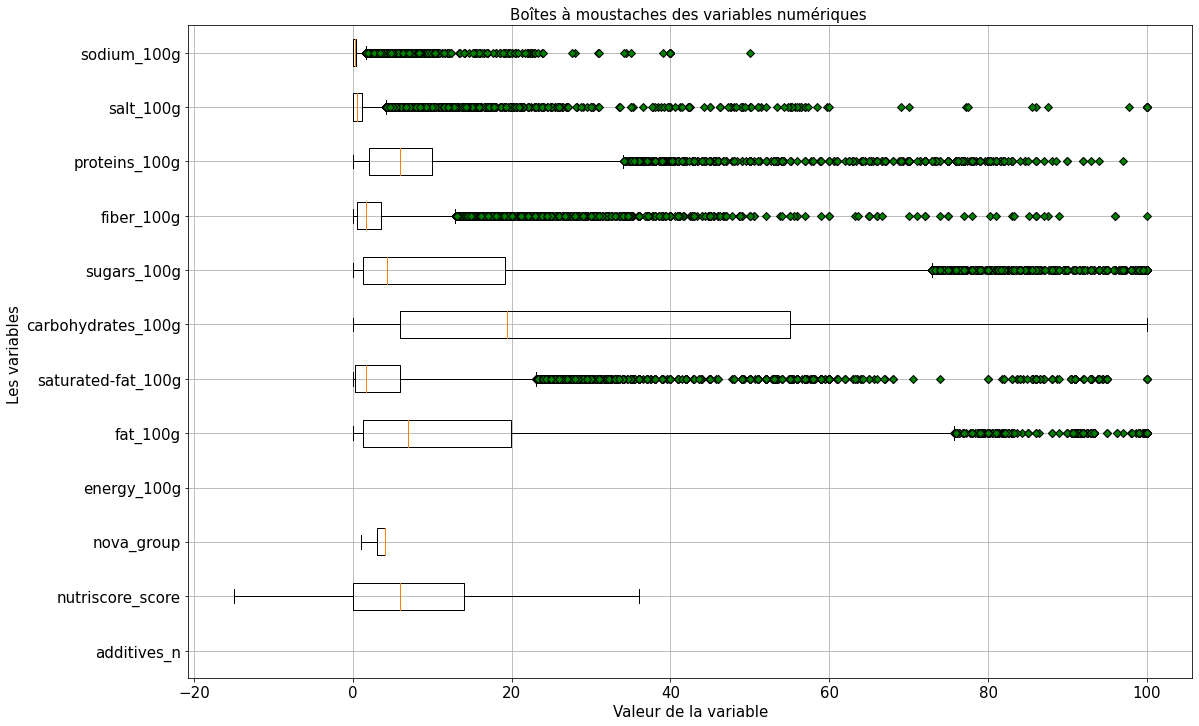

In [40]:
def Box_Plot(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    green_diamond = dict(markerfacecolor='g', marker='D')
    plt.figure(figsize=(18,12))
    plt.boxplot(data,vert=False,flierprops=green_diamond,whis=3)
    #xint = []
    #locs, labels = plt.xticks()
   # for each in locs:
        #xint.append(int(each))
    x=np.arange(1,len(list(data.columns))+1)
    plt.yticks(x,list(data.columns))
    #plt.xlim([0,data.shape[1]])
    #plt.yticks([0,20,40,60,80,100,120,125])
    # plot values on top of bars
    

    plt.xlabel("Valeur de la variable")
    plt.ylabel("Les variables ")
    plt.grid()
    
    plt.title("Boîtes à moustaches des variables numériques ")
    plt.show()
   

Box_Plot(data._get_numeric_data(),'data') 

D'aprés le graphe précédent, on peut remarquer que nos données comporte beaucoup de données  qui dépassent la borne supérieure Q3 + whis*(Q3-Q1), mais il s'agit des valeurs qu'on peut trouver dans la vie réelle.

In [41]:
quartiles=data.quantile([0.25,0.75])
for elt in quartiles.columns: 
    print(elt)
    data[data[elt]>(quartiles[elt].iloc[1]+3*(quartiles[elt].iloc[1]-quartiles[elt].iloc[0]))]


additives_n


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1602,00012317,2019-04-19T10:14:12Z,Club Turkey Bacon,Crous Languedoc Roussillon,"Sandwichs, en:raw-vegetable-sandwiches",17.0,-2.0,a,4.0,Composite foods,Sandwiches,795.000000,6.600000,1.90,19.900000,3.100000,4.0,10.50,1.3000,0.520
2405,00031172,2020-02-25T09:21:08Z,Tarte passion meringuée,Crous Languedoc Roussillon,"Tartes, Tartes sucrées, Tartes aux fruits, Tar...",13.0,15.0,d,4.0,Sugary snacks,Biscuits and cakes,1264.000000,11.300000,6.50,45.200001,27.799999,1.1,4.30,0.3000,0.120
48912,0024300044311,2013-07-13T18:10:36Z,Mini powdered donuts,"Little Debbie,Mckee Foods","Snacks, Sweet snacks, Confectioneries, Biscuit...",16.0,25.0,e,4.0,Sugary snacks,Biscuits and cakes,1816.000000,22.639999,11.32,54.720001,28.299999,0.0,5.66,1.0375,0.415
49085,0024300837869,2016-12-21T19:48:09Z,Cosmic brownie,"Little Debbie, Mckee Foods Corporation","Biscuits and cakes, Cakes",17.0,20.0,e,4.0,Sugary snacks,Biscuits and cakes,1849.000000,18.580000,7.96,66.370003,35.400002,1.8,3.54,0.5975,0.239
57255,0028989971951,2019-04-19T22:16:21Z,Veggie bacon strips,NaN,"Plant-based foods and beverages, Plant-based f...",14.0,12.0,d,4.0,fruits-and-vegetables,vegetables,1569.000000,28.120001,3.12,12.500000,0.000000,6.2,12.50,3.6575,1.463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773719,8801062267712,2018-04-26T23:08:33Z,Pepero Almond & Chocolate,Lotte,"Snacks, Snacks sucrés",14.0,14.0,d,4.0,unknown,unknown,4.000000,34.000000,13.00,53.000000,31.000000,2.0,12.00,0.2000,0.080
1773880,8801073211223,2018-05-05T21:32:53Z,Hot chicken flavor ramen,NaN,"Meals, Soups",14.0,22.0,e,4.0,Composite foods,One-dish meals,1761.000000,15.710000,7.14,60.000000,7.140000,1.4,10.00,2.2850,0.914
1778785,8852018101086,2016-10-18T11:38:19Z,Instant noodle Kimchi flavour,YumYum,Nouilles-asiatiques,15.0,4.0,c,4.0,unknown,unknown,300.000000,2.400000,1.10,10.600000,1.300000,0.7,1.50,0.9000,0.360
1778803,8852018160045,2017-02-07T11:27:39Z,Nouilles Asiatiques Saveur Curry Vert,Yum Yum,"Aliments et boissons à base de végétaux, Alime...",17.0,8.0,c,4.0,Cereals and potatoes,Cereals,1272.000000,3.200000,1.40,9.500000,1.200000,0.0,1.30,1.0000,0.400


nutriscore_score


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g


nova_group


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g


energy_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
25789,00156318,2018-03-21T11:03:55Z,Dark Chocolate Corn Thins 4 x (130g),"Sainsbury’s, By sainsbury's",fr:Chocolate snack,1.0,22.0,e,4.0,unknown,unknown,8188.0,17.700001,10.300000,67.699997,23.000000,4.000000,7.00,0.370000,1.480000e-01
56116,0028400589895,2018-11-01T03:33:17Z,Cheetos Crunchy Flamin' Hot,Cheetos,"Snacks,Salty snacks,cheese flavored snacks",6.0,5.0,c,4.0,unknown,unknown,10600.0,39.299999,0.000000,53.599998,3.570000,3.570000,3.57,0.000002,9.070000e-07
246688,0084909000781,2017-07-25T15:54:13Z,Farine De Riz Gluant,Cock,"Aliments et boissons à base de végétaux, Alime...",0.0,7.0,c,1.0,Cereals and potatoes,Cereals,6159.0,0.000000,0.000000,80.000000,0.000000,0.800000,6.20,0.020000,8.000000e-03
597591,25168242,2018-10-10T16:08:59Z,barres noisettes et chocolat equitable,bio la vie,"Snacks, Snacks sucrés, Barres, Barres de céréales",0.0,12.0,d,3.0,Sugary snacks,Biscuits and cakes,19305.0,19.000000,4.000000,61.000000,19.000000,7.200000,7.50,0.190000,7.600000e-02
608762,26049199,2017-03-12T19:37:20Z,Galettes De Riz Complet,Narvik,"Aliments et boissons à base de végétaux, Alime...",0.0,22.0,e,4.0,Cereals and potatoes,Cereals,8297.0,18.000000,7.100000,71.000000,24.000000,0.000000,5.80,0.200000,8.000000e-02
656016,3041090063206,2014-11-07T17:00:43Z,Cracotte Céréales Complètes,lu,"Aliments et boissons à base de végétaux, Alime...",1.0,13.0,d,4.0,Cereals and potatoes,Bread,6556.0,2.900000,1.000000,73.000000,9.400000,5.100000,11.00,1.560000,6.240000e-01
672791,3111952023966,2018-01-06T18:39:29Z,Petit épeautre décortiqué,Biocoop,"Aliments et boissons à base de végétaux, Alime...",0.0,6.0,c,1.0,Cereals and potatoes,Cereals,5983.0,2.430000,0.410000,59.500000,6.680000,10.700000,15.60,0.000000,0.000000e+00
686270,3175681272927,2021-03-28T14:50:08Z,Muesli figue abricot au blé ancien,Gerblé Bio,biscuits,2.0,18.0,d,3.0,Sugary snacks,Biscuits and cakes,12900.0,17.000000,11.600000,63.299999,16.299999,8.160000,7.48,0.000000,0.000000e+00
778855,3278692500062,2017-04-15T14:14:12Z,Mousse au Caramel au Beurre Salé,Malo,"Produits laitiers, Desserts, Desserts lactés, ...",3.0,24.0,e,4.0,Milk and dairy products,Dairy desserts,7176.0,35.000000,23.000000,20.000000,18.000000,0.300000,4.70,0.400000,1.600000e-01
787898,3292070008728,2017-08-03T17:59:19Z,Keftedes veggie,L'Atelier Blini,"Snacks, Snacks salés, Apéritif",4.0,21.0,e,4.0,Salty snacks,Appetizers,5577.0,26.700001,3.700000,14.400000,3.400000,0.000000,5.90,1.870000,7.480000e-01


fat_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
36347,0020717812208,2017-10-27T03:15:46Z,Huile de sesame,Koon Chun,"Aliments et boissons à base de végétaux, Alime...",0.0,11.0,d,2.0,Cereals and potatoes,Cereals,3393.0,92.000000,13.000000,0.0,0.0,0.0,0.0,0.00,0.000
37226,0021000642199,2018-06-21T08:05:53Z,REAL MAYO,KRAFT,"Epicerie, Sauces, Mayonnaises, Sauces blanches",1.0,18.0,d,4.0,Fat and sauces,Dressings and sauces,692.0,76.900002,11.500000,0.0,0.0,0.0,0.0,1.37,0.547
113466,0041498205072,2017-08-14T01:49:05Z,"Coconut oil unrefined, cold-pressed virgin oil",Simply nature,"Plant-based foods and beverages, Plant-based f...",0.0,20.0,e,2.0,Fat and sauces,Fats,3586.0,100.000000,85.709999,0.0,0.0,0.0,0.0,0.00,0.000
117115,00415668,2015-02-14T17:04:32Z,Extra virgin olive oil,Sainsbury's,"Plant-based foods and beverages, Plant-based f...",0.0,6.0,c,2.0,Fat and sauces,Fats,3384.0,91.500000,13.100000,0.5,0.5,0.5,0.5,0.01,0.004
156611,0059749894777,2018-02-18T01:55:22Z,Beurre non salé,Sélection,Matières grasses,0.0,16.0,d,2.0,Fat and sauces,Fats,2929.0,80.000000,45.000000,0.0,0.0,0.0,1.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778118,8851046010032,2017-09-09T18:15:03Z,Huile de riz,Suriny,"Aliments et boissons à base de végétaux, Alime...",0.0,13.0,d,2.0,Cereals and potatoes,Cereals,3853.0,100.000000,24.299999,0.0,0.0,0.0,0.0,0.00,0.000
1778342,8851613003269,2017-08-24T20:44:43Z,Huile de coco vierge,Aroy D,"Aliments et boissons à base de végétaux, Alime...",0.0,20.0,e,2.0,Fat and sauces,Fats,3778.0,100.000000,94.000000,0.0,0.0,0.0,0.7,0.00,0.000
1778343,8851613003276,2017-03-14T07:23:13Z,Huile vierge de noix de coco,Aroy-D,"Aliments et boissons à base de végétaux, Alime...",0.0,20.0,e,2.0,Fat and sauces,Fats,3766.0,100.000000,94.000000,0.0,0.0,0.0,0.0,0.00,0.000
1779766,8853662040271,2017-07-08T18:16:36Z,Huile De Sésame 250ml,Exotic food,Matières grasses,0.0,12.0,d,2.0,Fat and sauces,Fats,3414.0,90.699997,18.400000,0.0,0.0,0.0,0.0,0.00,0.000


saturated-fat_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
4068,0009542031695,2018-04-07T12:43:13Z,Dark chocolate,Lindt,"Snacks, Sweet snacks, Confectioneries, Chocola...",0.0,15.0,d,3.0,Sugary snacks,Chocolate products,2406.0,47.500000,30.000000,35.000000,17.500000,7.5,10.00,0.0000,0.000
4077,0009542033750,2020-02-24T00:47:30Z,"70% cocoa extra dark chocolate truffles, extra...","Lindt, Lindt & Sprüngli","Snacks, Sweet snacks, Confectioneries, Chocola...",1.0,20.0,e,4.0,Sugary snacks,Sweets,2556.0,52.779999,38.889999,33.330002,25.000000,2.8,5.56,0.1725,0.069
4499,00101639,2018-03-27T12:54:04Z,Dark Chocolate,"Marks & Spencer,M&S","Snacks, Snacks sucrés, Cacao et dérivés, Choco...",0.0,19.0,e,3.0,Sugary snacks,Chocolate products,2381.0,40.400002,24.600000,38.099998,31.799999,9.9,8.40,0.1000,0.040
21468,0013964967401,2017-11-28T20:01:00Z,Noix de coco rapee,Pure Flow,"Aliments et boissons à base de végétaux, Alime...",0.0,5.0,c,1.0,Fruits and vegetables,Dried fruits,2876.0,68.000000,64.000000,7.300000,7.300000,11.0,6.80,0.1000,0.040
30609,00178631,2014-11-08T15:50:07Z,Dessicated coconut,"Sainsbury's,by sainsbury's","Plant-based foods and beverages, Plant-based f...",1.0,5.0,c,1.0,Fruits and vegetables,Dried fruits,2644.0,62.000000,53.400002,6.100000,6.100000,13.7,5.60,0.1000,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787572,8938505214740,2017-03-09T13:44:42Z,Tien Giange 80% Single Origin Vietnam Dark Cho...,Marou,"Snacks, Sweet snacks, Confectioneries, Chocola...",0.0,17.0,d,3.0,Sugary snacks,Chocolate products,2531.0,44.000000,28.000000,43.000000,23.000000,9.5,9.00,0.0050,0.002
1787573,8938505214757,2017-03-09T13:45:36Z,Treasure Island 3/4 Cocoa Dark Chocolate,Marou Faiseurs De Chocolat,"Snacks, Sweet snacks, Confectioneries, Chocola...",0.0,16.0,d,3.0,Sugary snacks,Sweets,2510.0,43.000000,29.500000,45.500000,22.500000,9.5,9.00,0.0100,0.004
1799837,9268114697733,2021-01-06T05:05:55Z,Beurre doux,"Elle & Vire,Savencia","Produits laitiers, Matières grasses, Produits ...",0.0,16.0,d,2.0,Fat and sauces,Fats,2251.0,60.000000,42.000000,0.800000,0.800000,0.0,1.00,0.0500,0.020
1805731,9311627603767,2017-09-16T16:24:41Z,Crème de coco Ayam™,"Ayam,Ayam Brand","Aliments et boissons à base de végétaux, Boiss...",0.0,7.0,c,1.0,Beverages,Plant-based milk substitutes,1190.0,28.000000,25.000000,4.000000,3.900000,0.0,3.10,0.0500,0.020


carbohydrates_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g


sugars_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
454,0000010206515,2017-11-19T20:15:51Z,Pâte à Sucre,Alice Délice,"Snacks, Snacks sucrés, Confiseries, Aides culi...",5.0,18.0,d,4.0,Sugary snacks,Sweets,1720.0,6.42,3.53,87.860001,81.669998,0.0,0.03,0.1000,0.04000
1545,00011501,2013-10-02T10:31:53Z,Curiously Strong Mints,Marks & Spencer,"Snacks, Sweet snacks, Confectioneries, Chocola...",1.0,14.0,d,4.0,Sugary snacks,Sweets,1665.0,0.50,0.50,96.000000,96.000000,0.1,0.90,0.0000,0.00000
3545,00088749,2017-10-26T11:24:47Z,Dolly Mixtures,Marks & Spencer,"Snacks, Snacks sucrés, Confiseries, Bonbons, B...",8.0,14.0,d,4.0,Sugary snacks,Sweets,1594.0,1.80,0.90,89.599998,86.599998,0.2,1.50,0.0500,0.02000
3550,00088824,2017-09-29T13:05:28Z,foam lobsters,Marks & Spencer,"Snacks, Sweet snacks, Confectioneries, Candies...",1.0,14.0,d,4.0,Sugary snacks,Sweets,1469.0,0.10,1.00,89.900002,74.599998,0.5,2.80,0.0300,0.01200
21531,0013971040043,2018-04-20T17:25:33Z,Banana chips,Bare,Snacks,0.0,2.0,b,1.0,unknown,unknown,1674.0,0.00,0.00,93.330002,73.330002,10.0,3.33,0.0000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791824,9002859076572,2018-02-19T19:46:21Z,Jelly Beans Im 250g Beutel Von Woogie,Woogie,"Snacks, Snacks sucrés, Confiseries, Bonbons, B...",9.0,14.0,d,4.0,Sugary snacks,Sweets,1573.0,0.00,0.00,94.000000,77.000000,0.0,0.00,0.1000,0.04000
1791867,9002859082979,2017-11-02T10:44:32Z,Zuckerwatte 50g Eimer Sweets & Candy,Woogie,"Snacks, Snacks sucrés, Confiseries, Bonbons",0.0,15.0,d,4.0,Sugary snacks,Sweets,1695.0,0.00,0.00,99.500000,99.500000,0.0,0.00,0.0000,0.00000
1801649,9300633967475,2019-02-24T03:24:54Z,Canadian Maple Syrup,Woolworths,"Édulcorants, Sirops, Sirops simples, Sirops d'...",0.0,20.0,e,2.0,unknown,unknown,6268.0,0.00,0.00,88.000000,85.500000,0.0,0.20,0.0000,0.00000
1811764,9415272101057,2018-03-25T05:27:04Z,Sucre En Poudre,CHELSEA,"Édulcorants, Sucres, Sucres blancs",0.0,15.0,d,2.0,Sugary snacks,Sweets,1703.0,0.00,0.00,100.000000,100.000000,0.0,0.00,0.0000,0.00000


fiber_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1645,000128550,2021-04-08T16:35:18Z,PATATE DOUCE EN POUDRE,Bulk,"Aliments et boissons à base de végétaux,Alimen...",0.0,0.0,b,1.0,unknown,unknown,1552.0,0.80,0.30,88.000000,13.000000,14.000000,2.900000,0.00000,0.000000
3335,0008346800025,2017-03-10T10:29:15Z,Peanut butter chocolate flavored advanced nutr...,Slimfast,Snacks,2.0,17.0,d,4.0,unknown,unknown,1820.0,26.09,19.57,56.520000,26.090000,21.700001,17.389999,0.65250,0.261000
12574,0011152010908,2017-02-17T16:55:59Z,Fueru Wakame Dried Seaweed,Wel pac,"Vegetable mixes, en:dried-seaweeds",0.0,-8.0,a,1.0,Fish Meat Eggs,Fish and seafood,787.0,2.60,0.70,11.000000,0.500000,20.000000,18.000000,1.20000,0.480000
12648,0011152070711,2017-03-09T12:17:48Z,Rice Seasoning,Ajishima Foods Co. Ltd.,"Groceries, Condiments",0.0,16.0,d,3.0,unknown,unknown,1795.0,14.29,0.00,42.860001,28.570000,14.300000,28.570000,6.42750,2.571000
12683,0011152134079,2017-03-09T13:03:56Z,Dried seaweed,"Wel pac,Welpac","Plant-based foods and beverages, Plant-based f...",0.0,8.0,c,1.0,Fish Meat Eggs,Fish and seafood,1230.0,0.00,0.50,58.820000,0.500000,23.500000,11.760000,5.88250,2.353000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803411,9310055536463,2019-04-05T01:13:08Z,All bran honey almond,Kelloggs,"Plant-based foods and beverages, Plant-based f...",0.0,7.0,c,4.0,Cereals and potatoes,Breakfast cereals,1530.0,5.00,0.50,60.500000,23.900000,16.100000,11.000000,0.80010,0.320040
1803412,9310055536494,2017-07-24T03:38:53Z,All-Bran Original,Kellogs,"Plant-based foods and beverages, Plant-based f...",0.0,6.0,c,3.0,Cereals and potatoes,Breakfast cereals,1380.0,2.70,0.50,48.299999,16.700001,28.000000,13.900000,0.91440,0.365760
1806313,9315090204599,2019-05-30T03:49:12Z,Cranberry & Almond Bars,"Freedom Foods, Barley+","Snacks, Sweet snacks, Bars, Cereal bars, Nuts ...",2.0,-3.0,a,4.0,Sugary snacks,Biscuits and cakes,1590.0,14.00,1.80,36.599998,10.700000,26.700001,10.800000,0.05842,0.023368
1806315,9315090204612,2019-05-31T01:52:43Z,Barley+ Pink Lady & Chia flavoured bars,freedom foods,"Snacks, Sweet snacks, Bars, Cereal bars",1.0,-2.0,a,4.0,Sugary snacks,Biscuits and cakes,1460.0,8.60,1.20,47.500000,16.700001,24.500000,8.300000,0.03302,0.013208


proteins_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
925,000039365,2017-11-20T19:59:10Z,Pure Whey Protein Berries & Cream,Bulk Powders,"Compléments alimentaires, Compléments pour le ...",4.0,11.0,d,4.0,unknown,unknown,1740.0,8.330000,5.000000,8.670000,8.670000,0.333,76.300003,0.370,0.1480
926,000039681,2018-01-06T13:03:37Z,Pure Whey Protein™ Chocolate Peanut,Bulk Powders,"Compléments alimentaires, Compléments pour le ...",3.0,12.0,d,4.0,unknown,unknown,1745.0,7.500000,5.000000,10.000000,10.000000,0.400,75.000000,0.351,0.1404
4814,00104364,2018-01-08T10:44:34Z,BBQ Beef Jerky,M&S,"Viandes, Viandes séchées, Viande de bœuf séchée",0.0,19.0,e,4.0,Fish Meat Eggs,Meat,1289.0,5.600000,2.300000,25.400000,21.299999,0.600,38.799999,13.430,5.3720
26600,0016000140912,2020-02-25T21:59:25Z,Protein bars,NaN,Snacks,4.0,9.0,c,4.0,unknown,unknown,1393.0,9.260000,5.560000,40.740002,3.700000,14.800,37.040001,1.250,0.5000
29798,0017082600035,2018-08-18T19:53:33Z,Boeuf séché,NaN,"Snacks, Meats, Dried meats, Beef jerkies",2.0,12.0,d,4.0,Fish Meat Eggs,Meat,895.0,3.570000,0.890000,5.360000,3.570000,0.000,41.070000,6.875,2.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774715,8809059294703,2018-01-12T12:10:17Z,Yaki Nori Algue Grillée,Hosan,"Aliments et boissons à base de végétaux, Alime...",0.0,10.0,c,1.0,Fish Meat Eggs,Fish and seafood,1477.0,0.400000,0.000000,43.599998,3.600000,1.000,44.000000,1.800,0.7200
1780181,8854923212307,2018-06-16T17:49:32Z,สแน็คแจ๊ค รสวาซาบิ,"Snack Jack,สแน็คแจ๊ค",ขนม-ของว่าง,4.0,17.0,d,4.0,unknown,unknown,2150.0,74.300003,28.299999,54.299999,2.860000,8.570,44.900002,1.430,0.5710
1794635,9010128001354,2018-02-01T05:52:57Z,"Bcaa Amino, Cola Lime",Women's Best,"Boissons, Boissons édulcorées",4.0,11.0,e,4.0,Beverages,Artificially sweetened beverages,1105.0,0.100000,0.100000,3.900000,0.000000,0.400,52.000000,0.300,0.1200
1794672,9010128003761,2017-10-16T14:00:57Z,Protein cookies,Women's Best,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",7.0,16.0,d,4.0,Sugary snacks,Biscuits and cakes,1820.0,23.000000,13.900000,20.500000,5.000000,10.000,37.000000,1.300,0.5200


salt_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
712,0000069162176,2018-01-30T13:08:13Z,Quenelles de brochet sauce Nantua,Bofrost,"Plats préparés, Plats préparés au poisson, Que...",1.0,16.0,d,4.0,Composite foods,One-dish meals,586.0,11.00,5.5,5.100000,0.600000,0.5,4.600000,4.900000,1.960000
1683,00013932,2019-08-20T09:52:43Z,Salade cuite,"Crous Languedoc Roussillon,Crous Resto'","Plats préparés, Salades, Plats préparés au poi...",0.0,12.0,d,3.0,Composite foods,One-dish meals,402.0,3.10,0.0,15.100000,9.400000,1.6,1.300000,9.200000,3.680000
2052,0002000008390,2017-10-23T14:00:15Z,Acras de morue,Chaleur Creole,"Snacks, Snacks salés, Produits de la mer, Apér...",2.0,11.0,d,4.0,Composite foods,One-dish meals,1360.0,4.00,1.1,50.500000,1.500000,4.6,19.299999,4.300000,1.720000
4814,00104364,2018-01-08T10:44:34Z,BBQ Beef Jerky,M&S,"Viandes, Viandes séchées, Viande de bœuf séchée",0.0,19.0,e,4.0,Fish Meat Eggs,Meat,1289.0,5.60,2.3,25.400000,21.299999,0.6,38.799999,13.430000,5.372000
12648,0011152070711,2017-03-09T12:17:48Z,Rice Seasoning,Ajishima Foods Co. Ltd.,"Groceries, Condiments",0.0,16.0,d,3.0,unknown,unknown,1795.0,14.29,0.0,42.860001,28.570000,14.3,28.570000,6.427500,2.571000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814691,9556041609142,2014-10-11T12:04:22Z,Sauce Piment Sriracha,Ayam,"Epicerie,Sauces,en:Epicerie,en:Sauces pimentée...",4.0,12.0,d,4.0,Fat and sauces,Dressings and sauces,448.0,0.70,0.0,24.299999,15.600000,2.7,0.800000,4.653280,1.861312
1814706,9556041611138,2014-06-03T11:18:25Z,Sauce soja,Ayam,"Epicerie, Condiments, Sauces, Sauces au soja",3.0,12.0,d,4.0,Fat and sauces,Dressings and sauces,276.0,0.00,0.0,12.000000,11.000000,0.2,4.500000,15.900000,6.360000
1814707,9556041611152,2017-06-17T12:00:08Z,Sauce Teriyaki Ayam™,Ayam,"Epicerie, Sauces, Sauces Teriyaki",0.0,21.0,e,4.0,Fat and sauces,Dressings and sauces,808.0,0.30,0.2,44.000000,43.000000,0.0,3.600000,17.799999,7.120000
1814717,9556041612548,2015-02-14T13:10:43Z,Pâte de Curry Vert Ayam™,Ayam,"Epicerie, Sauces, Pâtes de curry, Pâtes de cur...",0.0,12.0,d,3.0,Fat and sauces,Dressings and sauces,523.0,4.20,0.6,19.900000,16.000000,2.7,1.800000,6.700000,2.680000


sodium_100g


,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
712,0000069162176,2018-01-30T13:08:13Z,Quenelles de brochet sauce Nantua,Bofrost,"Plats préparés, Plats préparés au poisson, Que...",1.0,16.0,d,4.0,Composite foods,One-dish meals,586.0,11.00,5.5,5.100000,0.600000,0.5,4.600000,4.900000,1.960000
1683,00013932,2019-08-20T09:52:43Z,Salade cuite,"Crous Languedoc Roussillon,Crous Resto'","Plats préparés, Salades, Plats préparés au poi...",0.0,12.0,d,3.0,Composite foods,One-dish meals,402.0,3.10,0.0,15.100000,9.400000,1.6,1.300000,9.200000,3.680000
2052,0002000008390,2017-10-23T14:00:15Z,Acras de morue,Chaleur Creole,"Snacks, Snacks salés, Produits de la mer, Apér...",2.0,11.0,d,4.0,Composite foods,One-dish meals,1360.0,4.00,1.1,50.500000,1.500000,4.6,19.299999,4.300000,1.720000
4814,00104364,2018-01-08T10:44:34Z,BBQ Beef Jerky,M&S,"Viandes, Viandes séchées, Viande de bœuf séchée",0.0,19.0,e,4.0,Fish Meat Eggs,Meat,1289.0,5.60,2.3,25.400000,21.299999,0.6,38.799999,13.430000,5.372000
12648,0011152070711,2017-03-09T12:17:48Z,Rice Seasoning,Ajishima Foods Co. Ltd.,"Groceries, Condiments",0.0,16.0,d,3.0,unknown,unknown,1795.0,14.29,0.0,42.860001,28.570000,14.3,28.570000,6.427500,2.571000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814691,9556041609142,2014-10-11T12:04:22Z,Sauce Piment Sriracha,Ayam,"Epicerie,Sauces,en:Epicerie,en:Sauces pimentée...",4.0,12.0,d,4.0,Fat and sauces,Dressings and sauces,448.0,0.70,0.0,24.299999,15.600000,2.7,0.800000,4.653280,1.861312
1814706,9556041611138,2014-06-03T11:18:25Z,Sauce soja,Ayam,"Epicerie, Condiments, Sauces, Sauces au soja",3.0,12.0,d,4.0,Fat and sauces,Dressings and sauces,276.0,0.00,0.0,12.000000,11.000000,0.2,4.500000,15.900000,6.360000
1814707,9556041611152,2017-06-17T12:00:08Z,Sauce Teriyaki Ayam™,Ayam,"Epicerie, Sauces, Sauces Teriyaki",0.0,21.0,e,4.0,Fat and sauces,Dressings and sauces,808.0,0.30,0.2,44.000000,43.000000,0.0,3.600000,17.799999,7.120000
1814717,9556041612548,2015-02-14T13:10:43Z,Pâte de Curry Vert Ayam™,Ayam,"Epicerie, Sauces, Pâtes de curry, Pâtes de cur...",0.0,12.0,d,3.0,Fat and sauces,Dressings and sauces,523.0,4.20,0.6,19.900000,16.000000,2.7,1.800000,6.700000,2.680000


## Imputation des données manquantes

In [42]:
%%time
imp= IterativeImputer()
imp.fit_transform(data._get_numeric_data())#sans Labelencoding
#imp_mean.fit_transform(data)#Avec Labelencoding

Wall time: 1.64 s


array([[ 3.    , -4.    ,  4.    , ...,  9.5   ,  0.358 ,  0.1432],
       [ 2.    ,  0.    ,  4.    , ...,  6.8   ,  0.7   ,  0.28  ],
       [ 4.    ,  2.    ,  4.    , ...,  6.8   ,  0.5   ,  0.2   ],
       ...,
       [ 2.    , 25.    ,  4.    , ...,  7.3   ,  0.24  ,  0.096 ],
       [ 2.    , 23.    ,  4.    , ...,  8.3   ,  0.2   ,  0.08  ],
       [ 0.    , -4.    ,  1.    , ..., 14.95  ,  0.    ,  0.    ]],
      dtype=float32)

In [43]:
data.isnull().mean()

code                  0.000000
created_datetime      0.000000
product_name          0.002698
brands                0.015700
categories            0.000000
additives_n           0.000523
nutriscore_score      0.000000
nutriscore_grade      0.000000
nova_group            0.000000
pnns_groups_1         0.002520
pnns_groups_2         0.000000
energy_100g           0.000024
fat_100g              0.000000
saturated-fat_100g    0.000000
carbohydrates_100g    0.000000
sugars_100g           0.000000
fiber_100g            0.000000
proteins_100g         0.000000
salt_100g             0.000000
sodium_100g           0.000000
dtype: float64

In [44]:
data=data.dropna()

In [45]:
data

,code,created_datetime,product_name,brands,categories,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
69,0000000005470,2017-11-27T10:34:20Z,BAguette bressan,Crousresto',"Aliments et boissons à base de végétaux, Alime...",3.0,-4.0,a,4.0,Cereals and potatoes,Bread,669.000000,2.200000,0.50,25.200001,0.600000,1.60,9.500,0.358,0.1432
330,0000000274722,2017-12-30T18:41:49Z,Blanquette de Volaille et son Riz,Comme J’aime,"Plats préparés, Produits à la viande, Plats pr...",2.0,0.0,b,4.0,Composite foods,One-dish meals,450.000000,2.200000,0.90,15.300000,0.500000,0.50,6.800,0.700,0.2800
353,0000000491228,2018-12-01T19:02:44Z,Entremets Crème Brulée,Comme j'aime,"Produits laitiers, Desserts, Produits déshydra...",4.0,2.0,b,4.0,Milk and dairy products,Dairy desserts,1952.400024,15.300000,11.20,75.500000,69.800003,0.10,6.800,0.500,0.2000
395,0000005016,2020-04-30T08:19:14Z,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Epicerie, Sauces, Sauces Pesto",0.0,23.0,e,3.0,Fat and sauces,Dressings and sauces,2318.000000,53.200001,9.60,11.700000,0.500000,1.30,8.200,2.700,1.0800
397,0000005018,2020-04-30T08:15:52Z,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Produits à tartiner, Produits à tartiner salés...",1.0,11.0,d,3.0,Salty snacks,Salty and fatty products,1104.000000,27.400000,3.90,1.800000,0.000000,3.50,1.900,2.700,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815696,96107775,2015-02-19T21:05:22Z,Colman's Original English Squeezy Mustard,"Unilever,Colman's","Groceries, Condiments, Sauces, Mustards",2.0,14.0,d,4.0,Fat and sauces,Dressings and sauces,813.000000,12.000000,0.70,13.000000,13.000000,0.60,6.800,8.500,3.4000
1815707,96118580,2016-12-22T07:02:13Z,Fisherman's Friend Miel-Citron,Fisherman's Friend,"Snacks, Snacks sucrés, Confiseries, Bonbons, P...",5.0,3.0,c,4.0,Sugary snacks,Sweets,1031.000000,1.300000,1.28,95.309998,0.100000,1.47,0.004,0.001,0.0004
1815708,96119341,2018-10-27T14:27:12Z,Cadbury dairy milk chocolate bar,Cadbury,"Snacks, Sweet snacks, Cocoa and its products, ...",2.0,25.0,e,4.0,Sugary snacks,Chocolate products,2234.000000,30.000000,18.00,57.000000,56.000000,2.10,7.300,0.240,0.0960
1815741,96133262,2017-01-15T20:48:40Z,Cadbury dairy milk chocolate bar wholenut,Cadbury,"Snacks, Sweet snacks, Confectioneries",2.0,23.0,e,4.0,Sugary snacks,Sweets,2322.000000,34.000000,16.00,49.500000,49.000000,3.00,8.300,0.200,0.0800


## Enregistrement du Nouveau jeu de données dans un fichier csv

On va enregistrer notre dataset nettoyées afin de pouvoir le charger après et l'utiliser pour notre analyse exploratoire 

In [46]:
path=r"\Users\Utilisateur\Downloads\openfoodfacts_optimized.csv"
data.to_csv(path,index=False)
